Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import CSV Files
station_POI = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/FOURSQUARE_Lisbon_Station_Surroundings.csv')

lb_citybikes = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/lisbon_bike_station_df.csv')

In [206]:
# View descriptive statistics of Citybike Stations
lb_citybikes.describe()

,latitude,longitude,free bikes,empty slots,total slots,station_id
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,38.741705,-9.148699,5.579487,14.389744,19.969231,97.000000
std,0.022466,0.027642,5.792600,8.440324,7.675042,56.435804
min,38.693500,-9.226569,0.000000,0.000000,10.000000,0.000000
25%,38.727779,-9.161227,1.500000,8.000000,14.000000,48.500000
50%,38.742574,-9.147930,4.000000,14.000000,19.000000,97.000000
75%,38.759465,-9.135863,8.000000,18.000000,23.000000,145.500000
max,38.793000,-9.092350,35.000000,42.000000,43.000000,194.000000


In [5]:
lb_citybikes.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4


In [6]:
# View descriptive statistics of Points_Of_Interest 
station_POI.describe()

,rating,popularity,distance,veracity,station_id
count,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000
mean,0.831546,0.831546,419.132685,4.082178,96.477127
std,0.240817,0.240817,209.879028,0.913773,56.214922
min,0.000820,0.000820,7.000000,1.000000,0.000000
25%,0.864772,0.864772,263.250000,4.000000,48.000000
50%,0.933665,0.933665,400.000000,4.000000,96.000000
75%,0.971772,0.971772,557.000000,5.000000,145.000000
max,1.000000,1.000000,999.000000,5.000000,194.000000


In [183]:
station_POI

,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library",0,0
1,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall,0,1
2,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden",0,2
3,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,0.952559,12,0.952559,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,0.892909,17,0.892909,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,0.971496,255,0.971496,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,0.969178,26,0.969178,404,5,"Café, Cafeteria",194,9660


In [7]:
# Merge DataFrame by BikeStation_ID
bikestations_POI = pd.merge(lb_citybikes,station_POI,on='station_id',how='inner')

bikestations_POI.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id,name,rating,total num ratings,popularity,distance,veracity,category
0,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library"
1,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall
2,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden"
3,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant
4,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store


In [8]:
# Observe data types and begin cleaning where necessary
bikestations_POI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           9662 non-null   float64
 1   longitude          9662 non-null   float64
 2   timestamp          9662 non-null   object 
 3   free bikes         9662 non-null   int64  
 4   empty slots        9662 non-null   int64  
 5   total slots        9662 non-null   int64  
 6   station_id         9662 non-null   int64  
 7   name               9662 non-null   object 
 8   rating             9662 non-null   float64
 9   total num ratings  9662 non-null   object 
 10  popularity         9662 non-null   float64
 11  distance           9662 non-null   int64  
 12  veracity           9662 non-null   int64  
 13  category           9644 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.0+ MB


In [9]:
# Total Number Of Ratings has object '{}' values
print(bikestations_POI['total num ratings'].dtype)
print(bikestations_POI['total num ratings'].head(10))

object
0     21
1    127
2     47
3     11
4     40
5    351
6    199
7     {}
8     10
9     63
Name: total num ratings, dtype: object


In [175]:
# Clean Total Number Of Ratings column into Numeric Dtype

# AI Assistance
bikestations_POI['total num ratings'] = pd.to_numeric(
    bikestations_POI['total num ratings']
        .astype(str)
        .str.replace(r'[{}]', '', regex=True)
        .str.strip(), 
    errors='coerce'    
)

print(bikestations_POI['total num ratings'].dtype)
print(bikestations_POI['total num ratings'].head(10))

float64
0     21.0
1    127.0
2     47.0
3     11.0
4     40.0
5    351.0
6    199.0
7      NaN
8     10.0
9     63.0
Name: total num ratings, dtype: float64


In [11]:
bikestations_POI.value_counts('category').head(5)

category
Portuguese Restaurant    946
Restaurant               578
Café                     494
Bakery                   305
Coffee Shop              173
Name: count, dtype: int64

In [225]:
# Recreate category filters for top 5 category types + bar

# Filter masks for categories values
restaurant_mask = bikestations_POI['category'].str.contains('Restaurant', case=False, na=False)
bar_mask = bikestations_POI['category'].str.contains('Bar', case=False, na=False)
cafe_mask = bikestations_POI['category'].str.contains('Café', case=False, na=False)
bakery_mask = bikestations_POI['category'].str.contains('Bakery', case=False, na=False)
coffee_mask = bikestations_POI['category'].str.contains('Coffee', case=False, na=False)

# Create Series for each mask-filter
restaurant_counts = bikestations_POI[restaurant_mask].groupby('station_id').size().rename('restaurant_count')
bar_counts = bikestations_POI[bar_mask].groupby('station_id').size().rename('bar_count')
cafe_counts = bikestations_POI[cafe_mask].groupby('station_id').size().rename('cafe_counts')
bakery_counts = bikestations_POI[bakery_mask].groupby('station_id').size().rename('bakery_counts')
coffee_counts = bikestations_POI[coffee_mask].groupby('station_id').size().rename('coffee_counts')


# Concatenate Series into Dataframe 
categories_counts = pd.concat([restaurant_counts, bar_counts,cafe_counts,bakery_counts,coffee_counts], axis=1).fillna(0).astype(int)
categories_counts.reset_index(inplace=True)

# Observe category values for each bike_station
categories_counts

,station_id,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,18,1,8,2,2
1,1,18,1,6,0,2
2,2,18,0,4,4,1
3,3,12,1,4,2,3
4,4,21,3,4,2,1
...,...,...,...,...,...,...
190,190,17,4,3,3,1
191,191,13,0,1,1,2
192,192,24,3,3,2,1
193,193,20,11,2,1,2


In [ ]:
# Create new Dataframe observing ratings of locations nearby each bike_station
EDA_bikestations = bikestations_POI.groupby(['station_id', 'free bikes','empty slots','total slots']).agg({
    'rating': 'mean',
    'total num ratings': 'sum'
}).reset_index()




,station_id,free bikes,empty slots,total slots,rating,total num ratings
0,0,0,32,32,0.857668,2772.0
1,1,0,23,23,0.780331,1808.0
2,2,7,26,33,0.804175,1134.0
3,3,8,6,14,0.798679,1669.0
4,4,6,17,23,0.803990,6061.0
...,...,...,...,...,...,...
190,190,12,18,30,0.869974,7211.0
191,191,1,40,41,0.739951,774.0
192,192,0,17,17,0.754461,3428.0
193,193,16,4,20,0.948785,14309.0


In [ ]:
# Concatenate Ratings_DF and Categories_DF for further analysis
EDA_bikestations = pd.merge(EDA_bikestations, categories_counts,on='station_id',how='inner')

EDA_bikestations.rename(columns={
    'total slots':'total bike slots',
    'rating':'average rating',
    'total num ratings':'total ratings'
    },
    inplace=True)

EDA_bikestations

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,0.857668,2772.0,18,1,8,2,2
1,1,0,23,23,0.780331,1808.0,18,1,6,0,2
2,2,7,26,33,0.804175,1134.0,18,0,4,4,1
3,3,8,6,14,0.798679,1669.0,12,1,4,2,3
4,4,6,17,23,0.803990,6061.0,21,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
190,190,12,18,30,0.869974,7211.0,17,4,3,3,1
191,191,1,40,41,0.739951,774.0,13,0,1,1,2
192,192,0,17,17,0.754461,3428.0,24,3,3,2,1
193,193,16,4,20,0.948785,14309.0,20,11,2,1,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

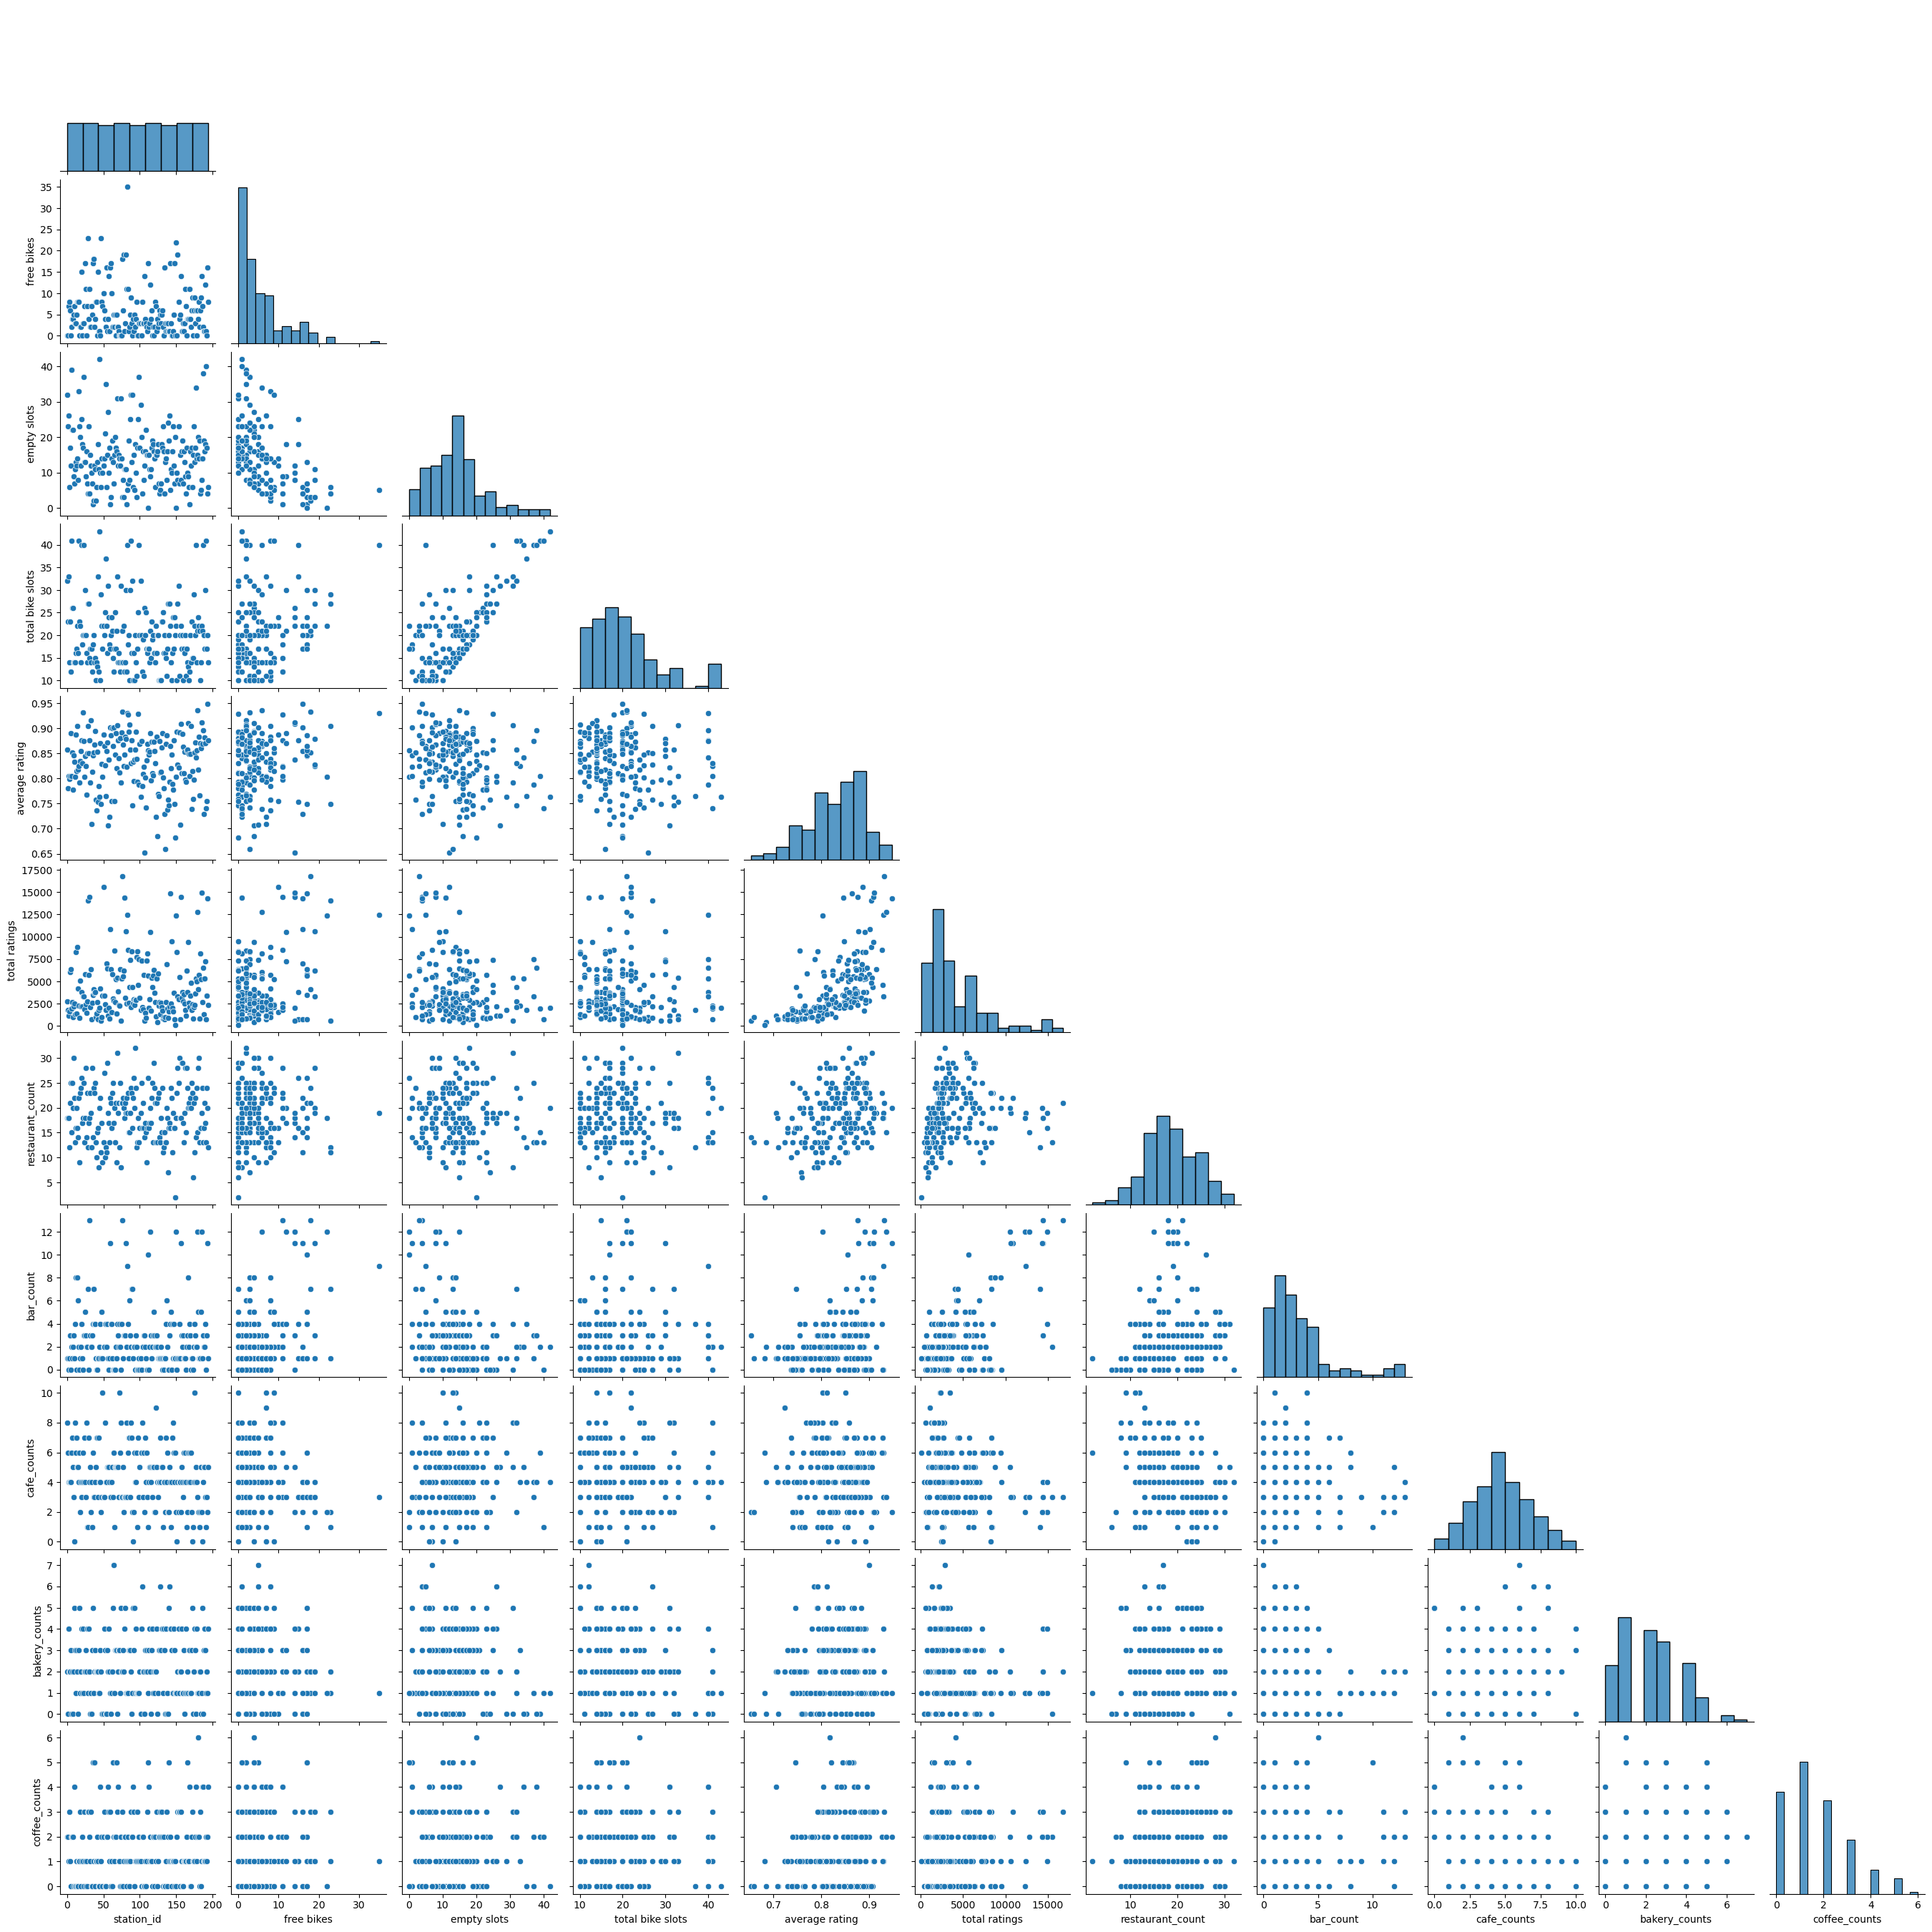

In [178]:
# CityBike Data relationships with FOURSQUARE Points_Of_Interest In Lisbon City, Portugal

# Seaborn's Pairplot
sns.pairplot(EDA_bikestations,corner=True)
plt.show()

### Relationships

- CityBike Data
    - Observing trends with **Total Bikes Slots** for each Bike Station to **retain a constant variable**
        - Other variables, such as Free Slots, Empty Slots, fluctuate in accordance with TimeStamp.


#### Total Bike Slot Relationships

- No strong relationships identified from visualisation Pairplot


--------------------------------------------------------

### Alternative Relationships

#### Free Bikes & Categories

- Timestamp of acquired CityBike API Data is **12:39 AM Sunday, July 27 2025.**
- With this aclnowledgement, observe 
    - Hypothesis Testing
        - **Free Bikes Vs Counts of Restaurants & Bars**
        - **Free Bikes Vs Average Local Ratings & Total Local Ratings**

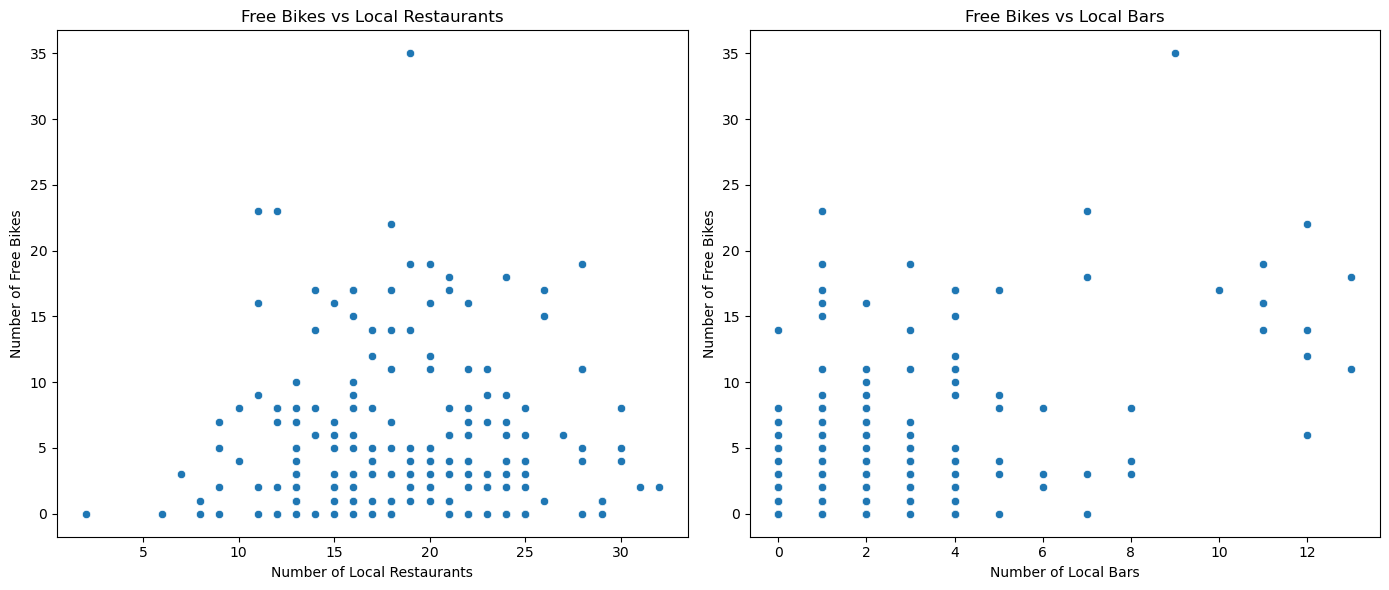

In [181]:
freebikes_figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Restaurants Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations,
    x='restaurant_count',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Restaurants')
axes[0].set_xlabel("Number of Local Restaurants")
axes[0].set_ylabel("Number of Free Bikes")

# Bars Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations,
    x='bar_count',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Local Bars')
axes[1].set_xlabel("Number of Local Bars")
axes[1].set_ylabel("Number of Free Bikes")

plt.tight_layout()

freebikes_attractions_subplot_fig = freebikes_figure

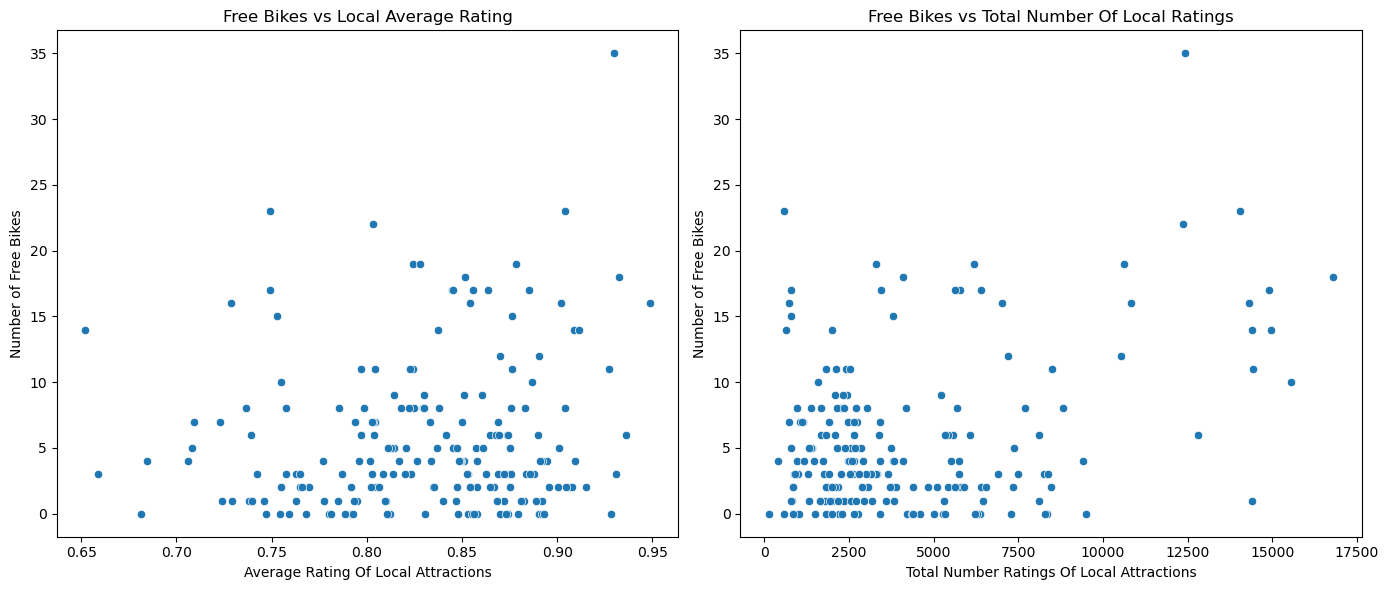

In [ ]:
freebikes_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Free Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Free Bikes")

# Free Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='total ratings',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Total Number Of Local Ratings')
axes[1].set_xlabel("Total Ratings Of Local Attractions")
axes[1].set_ylabel("Number of Free Bikes")


plt.tight_layout()
freebikes_rating_fig = freebikes_local_ratings


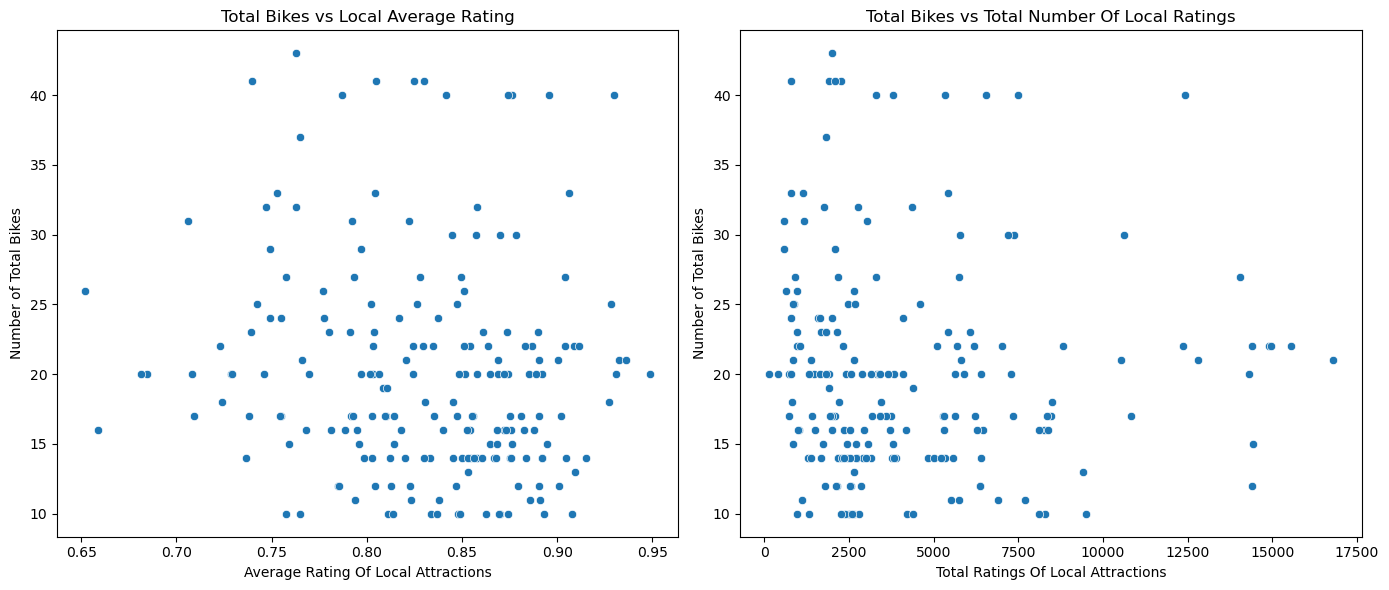

In [ ]:
totalbikes_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Total Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='total bike slots',
    ax=axes[0]
)
axes[0].set_title('Total Bikes vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Total Bikes")

# Total Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='total ratings',
    y='total bike slots',
    ax=axes[1]
)
axes[1].set_title('Total Bikes vs Total Number Of Local Ratings')
axes[1].set_xlabel("Total Ratings Of Local Attractions")
axes[1].set_ylabel("Number of Total Bikes")


plt.tight_layout()
totalbikes_rating_fig = totalbikes_local_ratings


In [ ]:
emptyslots_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Total Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='total bike slots',
    ax=axes[0]
)
axes[0].set_title('Total Bikes vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Total Bikes")

# Total Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='total ratings',
    y='total bike slots',
    ax=axes[1]
)
axes[1].set_title('Total Bikes vs Total Number Of Local Ratings')
axes[1].set_xlabel("Total Ratings Of Local Attractions")
axes[1].set_ylabel("Number of Total Bikes")


plt.tight_layout()
totalbikes_rating_fig = totalbikes_local_ratings

# Additional Analysis

Acknowledging the FOURSQUARE_API Limitation of 50 locations per Bike_station's coordaintes, this selection bias for locations within a 1,000 metre radius for each bike station may skew findings. Bike_stations with large quantities of local locations are infringed upon, unable to provide all locations and subsequent dat; ratings, categories.

As a result, additional analysis to observe if Results-Response limitation of 50 location affected relationships

In [ ]:
# 187 Bike Stations
# Affected by 50 location limitation reponse at distance of 1,000m
counts = station_POI['station_id'].value_counts()
stations_with_50 = counts[counts == 50]
len(stations_with_50)

187

In [217]:
# Distance threshold found at 298 metres
# No Bike Stations incur bias from reponse limitation of 50 locations

station_summary = station_POI[station_POI['distance'] < 298].groupby('station_id').agg(
    max_distance=('distance', 'max'),
    location_count=('station_id', 'count')
).reset_index()

station_summary.sort_values('location_count', ascending=False)


,station_id,max_distance,location_count
152,157,286,49
172,177,279,48
148,153,265,48
95,97,275,48
181,187,292,47
...,...,...,...
168,173,226,2
185,191,96,2
141,145,261,1
135,139,282,1


In [ ]:
# Reproduce visualisation Pairplot to observe if distance threshold impacts relationships


# Filter dataframe for location with distance from Bike_station < 298 
bikestations_POI_298 = bikestations_POI[bikestations_POI['distance']< 298]

# Filter masks for categories values
restaurant_mask_298 = bikestations_POI_298['category'].str.contains('Restaurant', case=False, na=False)
bar_mask_298 = bikestations_POI_298['category'].str.contains('Bar', case=False, na=False)
cafe_mask_298 = bikestations_POI_298['category'].str.contains('Café', case=False, na=False)
bakery_mask_298 = bikestations_POI_298['category'].str.contains('Bakery', case=False, na=False)
coffee_mask_298 = bikestations_POI_298['category'].str.contains('Coffee', case=False, na=False)


# Apply masks
restaurant_counts_298 = bikestations_POI_298[restaurant_mask_298].groupby('station_id').size().rename('restaurant_count')
bar_counts_298 = bikestations_POI_298[bar_mask_298].groupby('station_id').size().rename('bar_count')
cafe_counts_298 = bikestations_POI_298[cafe_mask_298].groupby('station_id').size().rename('cafe_counts')
bakery_counts_298 = bikestations_POI_298[bakery_mask_298].groupby('station_id').size().rename('bakery_counts')
coffee_counts_298 = bikestations_POI_298[coffee_mask_298].groupby('station_id').size().rename('coffee_counts')


# Concatenate Series into Dataframe 
categories_counts_298 = pd.concat([restaurant_counts_298, bar_counts_298,cafe_counts_298,bakery_counts_298,coffee_counts_298], axis=1).fillna(0).astype(int)
categories_counts_298.reset_index(inplace=True)

# Observe new category values for each bike_station
categories_counts_298


,station_id,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,1,0,0,0,1
1,1,1,0,0,0,1
2,2,5,0,0,2,0
3,3,2,0,2,0,1
4,4,9,0,2,2,1
...,...,...,...,...,...,...
176,149,0,0,2,0,0
177,173,0,0,1,0,0
178,191,0,0,1,0,0
179,41,0,0,0,1,0


In [ ]:
# Create new Dataframe observing ratings of locations nearby each bike_station
EDA_bikestations_298 = bikestations_POI_298.groupby(['station_id', 'free bikes','empty slots','total slots']).agg({
    'rating': 'mean',
    'total num ratings': 'sum'
}).reset_index()


# Concatenate Ratings_DF and Categories_DF for further analysis
EDA_bikestations_298 = pd.merge(EDA_bikestations_298, categories_counts_298,on='station_id',how='inner')

EDA_bikestations_298.rename(columns={
    'total slots':'total bike slots',
    'rating':'average rating',
    'total num ratings':'total ratings'
    },
    inplace=True)

EDA_bikestations_298

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,0.780944,206.0,1,0,0,0,1
1,1,0,23,23,0.679418,185.0,1,0,0,0,1
2,2,7,26,33,0.786927,290.0,5,0,0,2,0
3,3,8,6,14,0.676800,120.0,2,0,2,0,1
4,4,6,17,23,0.771908,1477.0,9,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
176,189,1,16,17,0.874101,5085.0,21,1,5,4,1
177,190,12,18,30,0.777344,513.0,2,1,0,1,0
178,191,1,40,41,0.348146,0.0,0,0,1,0,0
179,192,0,17,17,0.720957,314.0,10,1,3,1,0


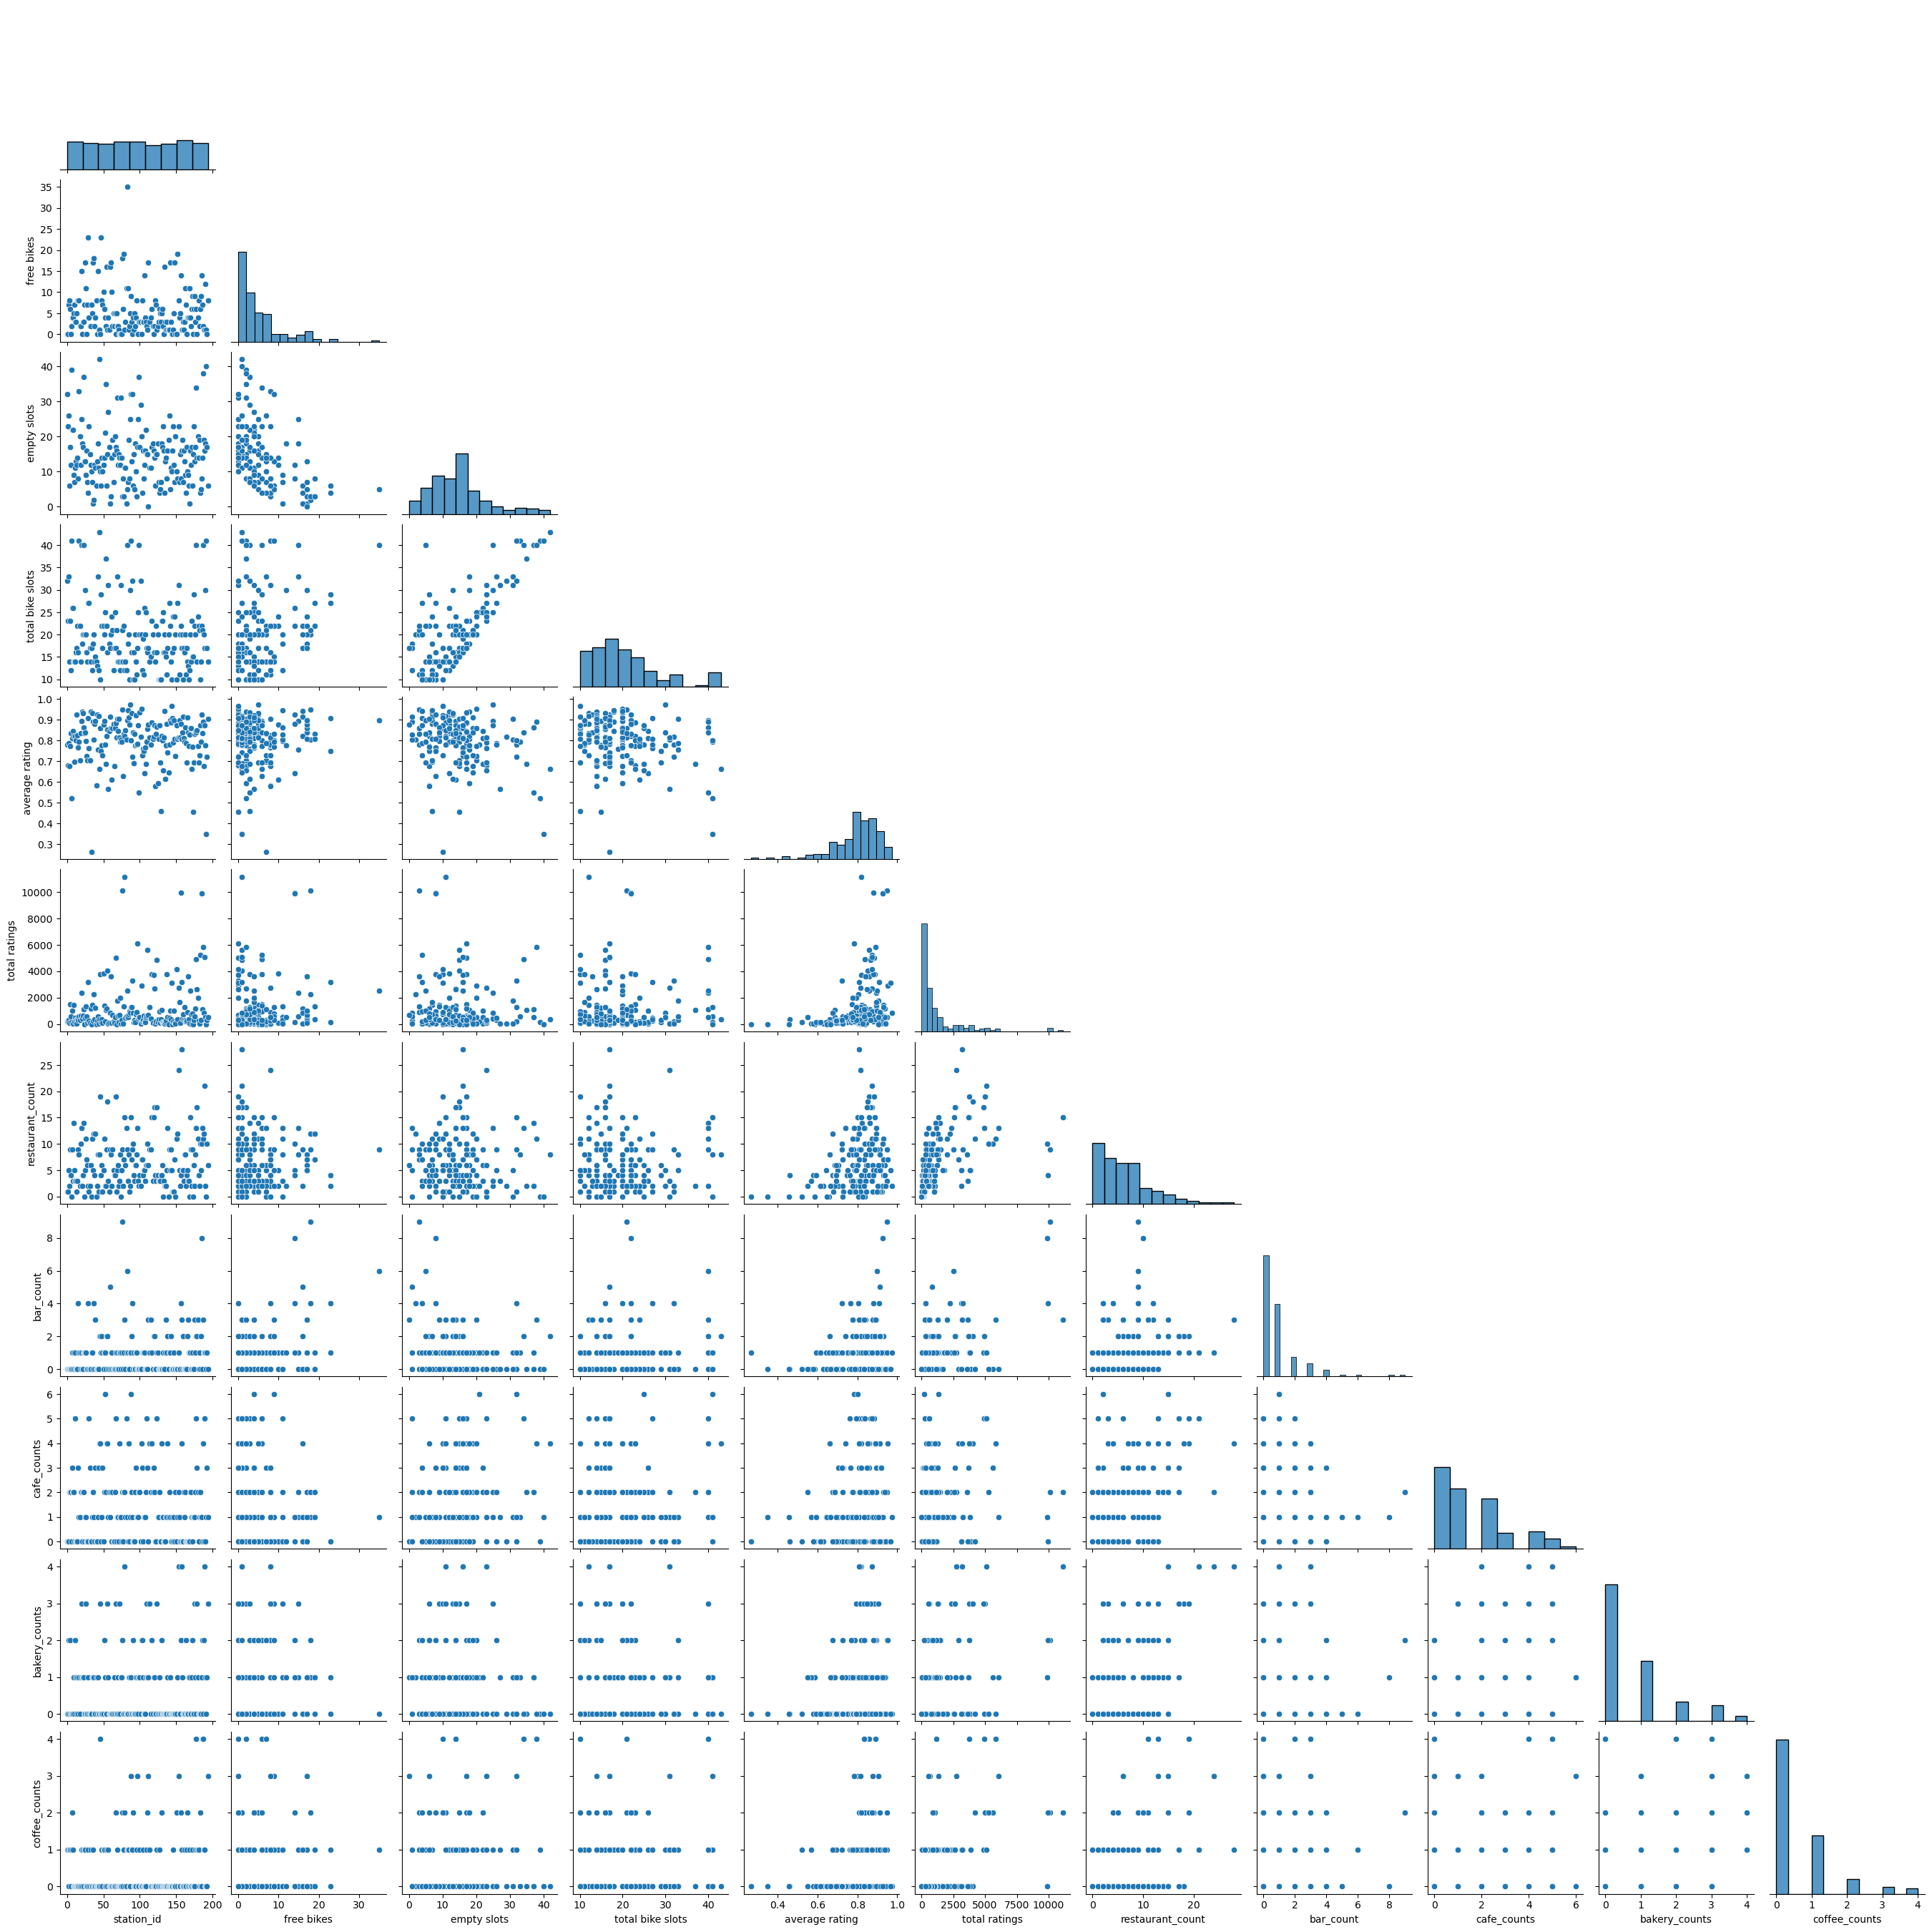

In [223]:
# CityBike Data relationships with FOURSQUARE Points_Of_Interest In Lisbon City, Portugal
# Distance of Location < 298

# Seaborn's Pairplot
sns.pairplot(EDA_bikestations_298,corner=True)
plt.show()

## Selection Bias Conclusion

After filter Locations for each Bike Station for distances < 298, the PairPlot shows no obvious visual change in relationships of bikes vs ratings and category values.

Therefore, while Selection Bias remains present for Bike_stations with > 50 locations within a 1,000 metre radius, this bias show no visual sign of influencing analysis of bikes vs locations

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [158]:
import sqlite3

### Tables to create

- bike stations
- bike availability
- local locations
- location categories

#

In [159]:
# Create SQL Database
connection = sqlite3.connect('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/citybikes_lisbon.db')
cursor = connection.cursor()

In [142]:
# Create Dataframe Copy 
lb_citybikes_stations = lb_citybikes.copy()

# Produce bike_stations Dataframe
lb_citybikes_stations.drop(columns=['free bikes','empty slots','total slots','timestamp'], inplace=True)
lb_citybikes_stations = lb_citybikes_stations[[
    'station_id',
    'latitude',
    'longitude'
]]
lb_citybikes_stations

,station_id,latitude,longitude
0,0,38.753590,-9.157170
1,1,38.752310,-9.158850
2,2,38.770657,-9.160248
3,3,38.780690,-9.096220
4,4,38.702936,-9.175234
...,...,...,...
190,190,38.729724,-9.157531
191,191,38.711498,-9.194361
192,192,38.739395,-9.162447
193,193,38.708780,-9.137125


In [170]:
# Create bike_stations SQL Table
lb_citybikes_stations.to_sql('bike_stations', con=connection, index=False, if_exists='replace')

195

In [144]:
# Create Dataframe Copy 
lb_citybikes_availability = lb_citybikes.copy()

# Produce bike_availability Dataframe
lb_citybikes_availability.drop(columns=['latitude','longitude'], inplace=True)
lb_citybikes_availability = lb_citybikes_availability[[
    'station_id',
    'total slots',
    'free bikes',
    'empty slots',
    'timestamp'
]]

lb_citybikes_availability

,station_id,total slots,free bikes,empty slots,timestamp
0,0,32,0,32,2025-07-26T23:39:44.571202+00:00Z
1,1,23,0,23,2025-07-26T23:39:44.571444+00:00Z
2,2,33,7,26,2025-07-26T23:39:44.570809+00:00Z
3,3,14,8,6,2025-07-26T23:39:44.570706+00:00Z
4,4,23,6,17,2025-07-26T23:39:44.571010+00:00Z
...,...,...,...,...,...
190,190,30,12,18,2025-07-26T23:39:44.571251+00:00Z
191,191,41,1,40,2025-07-26T23:39:44.570595+00:00Z
192,192,17,0,17,2025-07-26T23:39:44.571255+00:00Z
193,193,20,16,4,2025-07-26T23:39:44.571246+00:00Z


In [169]:
# Create bike_availability SQL Table
lb_citybikes_availability.to_sql('bike_availability', con=connection, index=False, if_exists='replace')

195

In [146]:
# Create Primary Key for Point_Of_Interest via Index
station_POI['interest_id'] = station_POI.index
station_POI

,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library",0,0
1,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall,0,1
2,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden",0,2
3,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,0.952559,12,0.952559,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,0.892909,17,0.892909,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,0.971496,255,0.971496,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,0.969178,26,0.969178,404,5,"Café, Cafeteria",194,9660


In [147]:
# 700 unique category values
station_POI['category'].value_counts().sort_values()

# Potential to clean categories once in dataframe by common keyvalues

category
Comfort Food Restaurant, Portuguese Restaurant      1
Sausage Store, Spanish Restaurant                   1
Juice Bar, Coffee Shop                              1
Steakhouse, Portuguese Restaurant                   1
Sandwich Spot, Italian Restaurant                   1
                                                 ... 
Coffee Shop                                       173
Bakery                                            305
Café                                              494
Restaurant                                        578
Portuguese Restaurant                             946
Name: count, Length: 700, dtype: int64

In [162]:
# Create Interest Category Dataframe using raw category value entries
category_POI = station_POI['category']
category_POI = category_POI.value_counts().sort_values(ascending=False)
category_POI = pd.DataFrame(category_POI).reset_index()
category_POI['category_id'] = category_POI.index
category_POI= category_POI.drop(columns=['count'])
category_POI = category_POI[[
    'category_id',
    'category'
]]
category_POI

,category_id,category
0,0,Portuguese Restaurant
1,1,Restaurant
2,2,Café
3,3,Bakery
4,4,Coffee Shop
...,...,...
695,695,"Sandwich Spot, Italian Restaurant"
696,696,"Steakhouse, Portuguese Restaurant"
697,697,"Juice Bar, Coffee Shop"
698,698,"Sausage Store, Spanish Restaurant"


In [168]:
# Create Location_Category SQL Table
category_POI.to_sql('location_category', con=connection, index=False,if_exists='replace')

700

In [164]:
# Create Locations Dataframe
locations_POI = pd.merge(station_POI,category_POI,on='category',how='inner')
locations_POI = locations_POI.drop(columns=['category'])
locations_POI = locations_POI.rename(columns={'distance':'metres_from_station'})
locations_POI = locations_POI.rename(columns={'total num ratings':'total ratings'})
locations_POI = locations_POI.rename(columns={'interest_id':'location_id'})

locations_POI = locations_POI[[
    'location_id',
    'name',
    'rating',
    'total ratings',
    'popularity',
    'metres_from_station',
    'veracity',
    'station_id',
    'category_id'
    
]]
locations_POI

,location_id,name,rating,total ratings,popularity,metres_from_station,veracity,station_id,category_id
0,0,Torre Do Tombo,0.944024,21,0.944024,124,4,0,147
1,1,Aula Magna,0.987013,127,0.987013,138,4,0,124
2,2,Alameda da Universidade,0.938399,47,0.938399,121,4,0,87
3,3,Letras Bar,0.781422,11,0.781422,87,3,0,0
4,4,Horto do Campo Grande,0.959710,40,0.959710,337,5,0,58
...,...,...,...,...,...,...,...,...,...
9639,9657,Pastelaria Florida,0.952559,12,0.952559,257,4,194,4
9640,9658,Continente Bom Dia Acqua Roma,0.892909,17,0.892909,506,5,194,248
9641,9659,Café Império,0.971496,255,0.971496,502,5,194,0
9642,9660,Quiosque da Alameda,0.969178,26,0.969178,404,5,194,342


In [166]:
# Create Locations SQL Table
locations_POI.to_sql('local_locations', con=connection, index=False,if_exists='replace')

9644

Look at the data before and after the join to validate your data.

In [171]:
# Two tables prior to join

#1 
station_POI


,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library",0,0
1,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall,0,1
2,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden",0,2
3,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,0.952559,12,0.952559,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,0.892909,17,0.892909,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,0.971496,255,0.971496,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,0.969178,26,0.969178,404,5,"Café, Cafeteria",194,9660


In [172]:
#2
lb_citybikes

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4
...,...,...,...,...,...,...,...
190,38.729724,-9.157531,2025-07-26T23:39:44.571251+00:00Z,12,18,30,190
191,38.711498,-9.194361,2025-07-26T23:39:44.570595+00:00Z,1,40,41,191
192,38.739395,-9.162447,2025-07-26T23:39:44.571255+00:00Z,0,17,17,192
193,38.708780,-9.137125,2025-07-26T23:39:44.571246+00:00Z,16,4,20,193


In [ ]:
# JOINED Table for analysis

# Observing bike counts, ratings and category counts for station
EDA_bikestations

,station_id,total bike slots,average rating,total ratings,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts,free bikes
0,0,32,0.857668,2772.0,18,1,8,2,2,0
1,1,23,0.780331,1808.0,18,1,6,0,2,0
2,2,33,0.804175,1134.0,18,0,4,4,1,7
3,3,14,0.798679,1669.0,12,1,4,2,3,8
4,4,23,0.803990,6061.0,21,3,4,2,1,6
...,...,...,...,...,...,...,...,...,...,...
190,190,30,0.869974,7211.0,17,4,3,3,1,12
191,191,41,0.739951,774.0,13,0,1,1,2,1
192,192,17,0.754461,3428.0,24,3,3,2,1,0
193,193,20,0.948785,14309.0,20,11,2,1,2,16
